# Regression

## Initialization

### Import the libraries you need in the cell below

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
### BEGIN YOUR CODE

Student_ID = 45

### END YOUR CODE

Now run the next cell. It will print all information for you.

In [ ]:
task_id = None if Student_ID is None else Student_ID % 5 if Student_ID % 5 > 0 else 5
_model_power = None if Student_ID is None else (Student_ID % 4) + 3
if task_id is not None:
    print(f"TASKID is {task_id}")
    print(f"Please, choose a dataset No {task_id} below")
    print(f"Your second model must be of power p = {_model_power}")
else:
    print("Please, enter your Student ID in the cell above!")

TASKID is 5
Please, choose a dataset No 5 below
Your second model must be of power p = 4


#### Datasets

1. Poultry meat consumption in Europe, kilograms per person per year

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Year | 2000 | 2001 | 2002 | 2003 | 2004 | 2005 | 2006 | 2007 | 2008 | 2009 | 
| Consumption | 16.0 | 17.9 | 18.6 | 18.3 | 19.0 | 19.3 | 19.2 | 20.3 | 21.1 | 21.9 | 

2. Sugar consumption in Russia, grams per person per day

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Decade | 1950 | 1960 | 1970 | 1980 | 1990 | 2000 | 2015 |
| Consumption | 32 | 85 | 115 | 130 | 130 | 96 | 107 |

3. Poultry meat consumption in Asia, kilograms per person per year

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Year | 2000 | 2001 | 2002 | 2003 | 2004 | 2005 | 2006 | 2007 | 2008 | 2009 | 
| Consumption | 6.7 | 6.6 | 6.8 | 7.0 | 7.0 | 7.5 | 7.7 | 8.2 | 8.6 | 8.8 | 

4. Poultry meat consumption in Africa, kilograms per person per year

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Year | 2000 | 2001 | 2002 | 2003 | 2004 | 2005 | 2006 | 2007 | 2008 | 2009 | 
| Consumption | 4.2 | 4.3 | 4.5 | 4.7 | 4.6 | 4.7 | 4.8 | 5.2 | 5.4 | 5.5 | 

5. Demographic situation in Russia, number of marriages per 1000 people per year

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Year | 2011 | 2012 | 2013 | 2014 | 2015 | 2016 | 2017 | 2018 | 2019 | 2020 |
| Marriages per 1000 population | 9.2 | 8.5 | 8.5 | 8.4 | 7.9 | 6.7 | 7.1 | 6.1 | 6.3 | 5.3 |


### 1. Define a pandas dataset with the data for your task
[This](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) documentation might help.

**Make sure to normalize your $x$ variable, i.e. replace years with sequential numbers 0, 1, ...**

In [ ]:
# Place your code here to create the dataset here
d = {'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
     'Marriages per 1000 population': [9.2, 8.5, 8.5, 8.4, 7.9, 6.7, 7.1, 6.1, 6.3, 5.3]}
df = pd.DataFrame(data=d)
df

,Year,Marriages per 1000 population
0,2011,9.2
1,2012,8.5
2,2013,8.5
3,2014,8.4
4,2015,7.9
5,2016,6.7
6,2017,7.1
7,2018,6.1
8,2019,6.3
9,2020,5.3


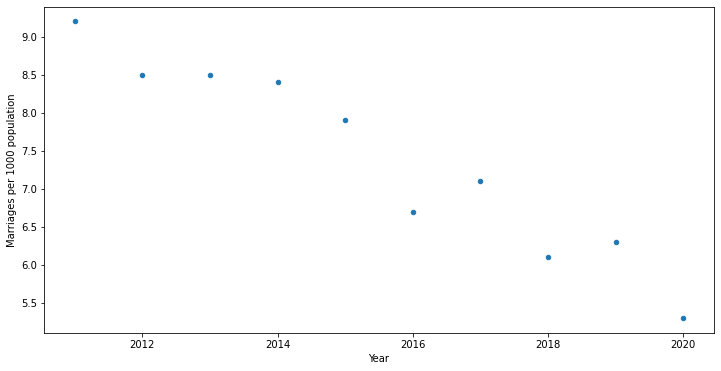

In [ ]:
ax1 = df.plot.scatter(x='Year', y='Marriages per 1000 population')

It seems that the data falls on a straight line.

In [ ]:
x = np.array([i for i in range(df.shape[0])])
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
y = np.array(df['Marriages per 1000 population'])
y

array([9.2, 8.5, 8.5, 8.4, 7.9, 6.7, 7.1, 6.1, 6.3, 5.3])

## First regression model

You should build the following model:

$$ y_1 = \theta_2 \cdot x^2 + \theta_1 \cdot x + \theta_0 $$

where $y$ is the response variable and $x$ is the explanatory variable (see description of your dataset).

### 2. Define feature matrix $X$ for the first model (1 point)

It should be a `numpy` array or a `pandas` dataframe

In [ ]:
feature_matrix_X = np.array([[i * i for i in x], x]).T

feature_matrix_X

array([[ 0,  0],
       [ 1,  1],
       [ 4,  2],
       [ 9,  3],
       [16,  4],
       [25,  5],
       [36,  6],
       [49,  7],
       [64,  8],
       [81,  9]])

### 3. Train first regression model with OLS method by using matrix multiplications (2 points)

Use the entire dataset for training. You can find the formula on our lectures and in the seminar notebook.

`first_model_coeffs` should be an iterable, e.g. a list or a numpy array

In [ ]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        # True if we want to use free term
        self.fit_intercept = fit_intercept


    def fit(self, X, y):
        n, k = X.shape
        
        X_train = X

        # Add a dummy attribute equal to 1 for a free term
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        return self
        

    def predict(self, X):
        n, k = X.shape
        
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred
    

    def get_weights(self):
        return self.w

In [ ]:
first_regressor = MyLinearRegression()
first_regressor.fit(feature_matrix_X, y)
first_model_predictions = first_regressor.predict(feature_matrix_X)
first_model_coeffs = first_regressor.get_weights()

print(f"Coefficints of the first regression model are '{first_model_coeffs}'")

Coefficints of the first regression model are '[-0.01098485 -0.31083333  9.11181818]'


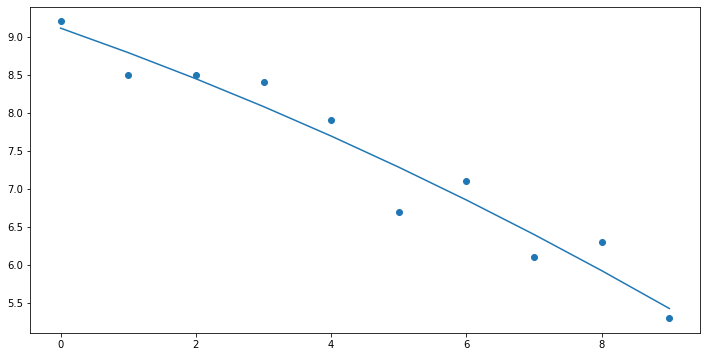

In [ ]:
# Curve of predicted values
plt.plot(x, first_model_predictions)

# True values
plt.scatter(x, y)

## Second regression model

Choose the power $p$ of your model (see step 0 above). You should build the following model:

$$ y_2 = \sum_{i=1}^{p}{\theta_i \cdot x^p} $$

where $y$ is the response variable and $x$ is the explanatory variable (see description of your dataset) and $p$ is the power of the model.

### 4. Train second regression model with OLS method using `stats.models.regression` module (2 points)

`second_model_coeffs` should be an iterable, e.g. a list or a numpy array

In [ ]:
features = np.power(x, _model_power).reshape(-1, 1)
for i in reversed(range(1, _model_power)):
    tmp = np.power(x, i).reshape(-1, 1)
    features = np.concatenate((features, tmp), axis=1)
print(features)

[[   0    0    0    0]
 [   1    1    1    1]
 [  16    8    4    2]
 [  81   27    9    3]
 [ 256   64   16    4]
 [ 625  125   25    5]
 [1296  216   36    6]
 [2401  343   49    7]
 [4096  512   64    8]
 [6561  729   81    9]]


In [ ]:
second_regressor = sm.OLS(y, features)
second_model_predictions = second_regressor.fit()
#print(second_model_predictions.summary())
second_model_coeffs = second_model_predictions.params

print(f"Coefficints of the second regression model are '{second_model_coeffs}'")

Coefficints of the second regression model are '[-0.02586967  0.54565829 -3.92366348 10.53944787]'


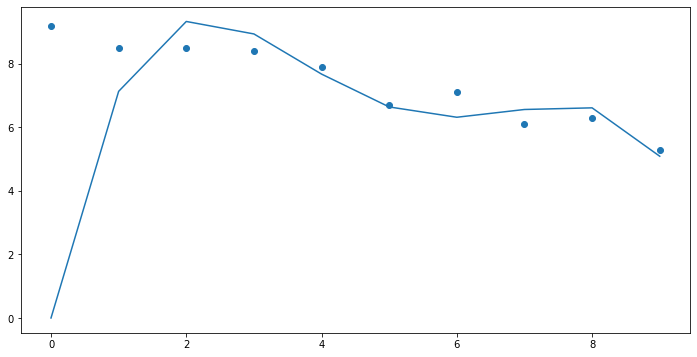

In [ ]:
# Curve of predicted values
plt.plot(x, second_model_predictions.predict())
#plt.plot(x, second_model_predictions)

# True values
plt.scatter(x, y)
plt.show()

## Third regression model

You should build the following model:

$$ y_3 = \theta_1 \cdot x + \theta_0 $$

where $y$ is the response variable and $x$ is the explanatory variable (see description of your dataset).

### 5. Train third regression model with gradient descent (3 points, optional)

You can write your own function for gradient descent or find one on the Internet. It should be possible to change the initial value and learning rate.

`third_model_coeffs` should be an iterable, e.g. a list or a numpy array

In [ ]:
class MyGradientLinearRegression(MyLinearRegression):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = None
    
    def fit(self, X, y, lr=0.01, max_iter=1000):
        n, k = X.shape

        # Initialize our model with random values
        # W is extended by one if free term is used
        if self.w is None:
            self.w = np.random.randn(k + 1 if self.fit_intercept else k)
        
        # Add a dummy attribute equal to 1 if free term is used
        X_train = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X
        
        self.losses = []
        
        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y_pred, y))
            grad = self._calc_gradient(X_train, y, y_pred)
            self.w -= lr * grad

        return self


    def _calc_gradient(self, X, y, y_pred):
        grad = 2 * (y_pred - y)[:, np.newaxis] * X
        grad = grad.mean(axis=0)
        return grad


    def get_losses(self):
        return self.losses

In [ ]:
third_regressor = MyGradientLinearRegression()
third_regressor.fit(x.reshape(-1, 1), y, max_iter=1000)

third_model_predictions = third_regressor.predict(x.reshape(-1, 1))
third_model_coeffs = third_regressor.get_weights()

print(f"Coefficints of the third regression model are '{third_model_coeffs}'")

Coefficints of the third regression model are '[-0.40456135  9.211433  ]'


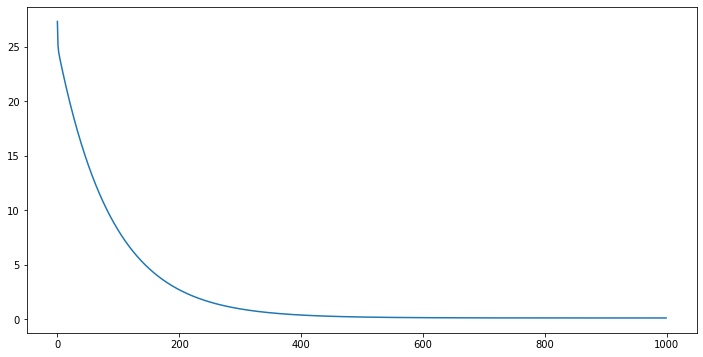

In [ ]:
plt.plot(third_regressor.get_losses())

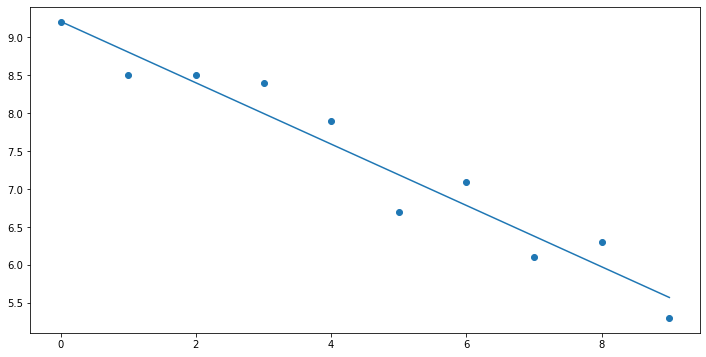

In [ ]:
# Predicted curve
plt.plot(x, third_model_predictions)

# True values
plt.scatter(x, y)

## Error estimation

### 6. Calculate MSE and RMSE for all your regression models (2 points)

Error estimations should be floating point numbers

0.08885303030303023
8.851365223706638
0.0955245168404691

0.29808225425716006
2.9751244047445544
0.3090704075780616


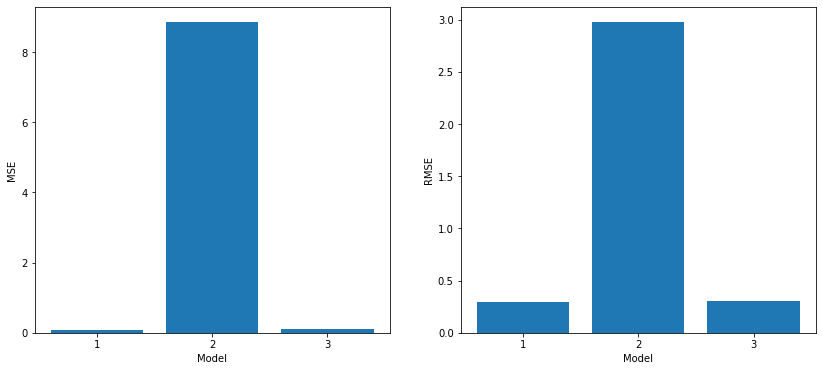

In [ ]:
first_model_mse = mean_squared_error(y, first_model_predictions)
print(first_model_mse)
second_model_mse = mean_squared_error(y, second_model_predictions.predict())
print(second_model_mse)
third_model_mse = mean_squared_error(y, third_model_predictions)
print(third_model_mse)

print()

first_model_rmse = np.sqrt(first_model_mse)
print(first_model_rmse)
second_model_rmse = np.sqrt(second_model_mse)
print(second_model_rmse)
third_model_rmse = np.sqrt(third_model_mse)
print(third_model_rmse)


x_ = ['1', '2', '3']
y1 = [first_model_mse, second_model_mse, third_model_mse]
y2 = [first_model_rmse, second_model_rmse, third_model_rmse]

fig = plt.figure(figsize=(14, 6))
axes = fig.subplots(1, 2)
axes[0].bar(x_, y1)
axes[0].set_ylabel('MSE')
axes[0].set_xlabel('Model')

axes[1].bar(x_, y2)
axes[1].set_ylabel('RMSE')
axes[1].set_xlabel('Model')

plt.show()

## Visualization

### 7. Use `matplotlib` to visualize your results (graded manually, exam)

You should build a single plot with all your models (2 or 3) drawn as curves/lines of different type and color. Additional points if you make the curves look smooth. Draw your dataset as dots on the same plot, do not connect them with lines.

In [ ]:
xl = np.linspace(0, 9, 1000)
y_first = [np.array(first_model_coeffs).T @ [i ** 2, i, 1] for i in xl]
y_second = [np.array(second_model_coeffs).T @ [i ** 4, i ** 3, i ** 2, i] for i in xl]

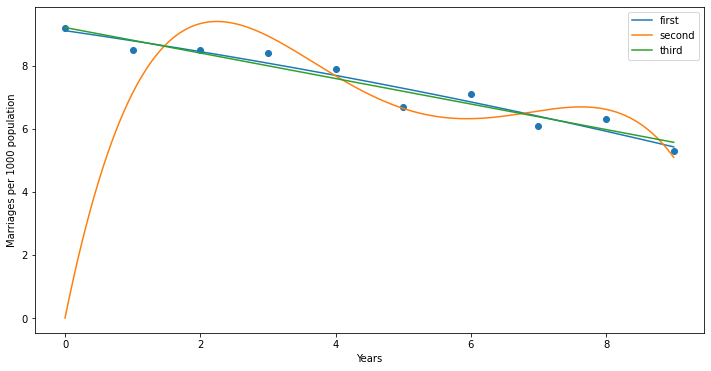

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.set_xlabel('Years')
ax.set_ylabel('Marriages per 1000 population')

ax.plot(xl, y_first, label='first')
ax.plot(xl, y_second, label='second')
ax.plot(x, third_model_predictions, label='third')
ax.scatter(x, y)
ax.legend()
fig.show()

### 8. Prepare to discuss your results with the teacher (exam)

Which model is better? Why? What else can you do to make the predictions better?

The first model shows us the best result because it has the smallest MSE, but I don't think it's the best model. 
With a small amount of data, the simpler the model, the better. Also, the distribution of true data is more like a straight line than a curve of the second degree. That's why the first model could overfit.

I think the third model is the best in our case. It has a slightly larger MSE than the first one, but it is simpler and better imitates true data.

To make predictions better we can: 
* try to use other machine learning models
* try to genererate new fitures for eample $x_{i-1} * x_{i}$ (paired multiplication of consecutive years)
* try to extend dataset if it possible.